# The Solar System Barycenter

## Defining the Purpose:

The Sun is assumed to be the direct center of the Solar System of along whose reference other bodies revolve. However, this is not true. The gravitation asserted by other bodies on each other and on the Sun changes the actual centre of the Solar System in terms of this Gravitational defintion. This actual point is called the 'Solar System Barycenter'. This is also time dependent as positions of bodies from each other impacts their exertion of force on each other.

---

Importing Required Libraries

In [1]:
import spiceypy
import numpy as np
import datetime
from matplotlib import pyplot as plt

Loading the Spice Kernels

In [2]:
spiceypy.furnsh(
    [
        '../../kernels/lsk/naif0012.tls',
        '../../kernels/pck/gm_de431.tpc',
        '../../kernels/pck/pck00010.tpc',
        '../../kernels/spk/de432s.bsp'
    ]
)

Taking the start date to measure the barycenter on different days from here onwards (My Birthday!) and the number of days to calculate the positions for, as well as the end time at which to stop the calculations

In [3]:
init_time = datetime.datetime(year=2004, month=10, day=7, hour=0, minute=0, second=0)

delta_days = 10000
end_time = init_time + datetime.timedelta(days=delta_days)

Converting to UTC Timestamps for Spice's Ephimeris time conversion requirements

In [4]:
init_time_utc = init_time.strftime("%Y-%m-%dT%H:%M:%S")
end_time_utc = end_time.strftime("%Y-%m-%dT%H:%M:%S")

print(f"Initial timestamp of calculation: {init_time_utc}")
print(f"End timestamp of calculations: {end_time_utc}")

Initial timestamp of calculation: 2004-10-07T00:00:00
End timestamp of calculations: 2032-02-23T00:00:00


Converting to Ephimeris timestamps

In [5]:
init_time_eph = spiceypy.utc2et(init_time_utc)
end_time_eph = spiceypy.utc2et(end_time_utc)

print(f"Ephimeris initial timestamp: {init_time_eph}")
print(f"Ephimeris end timestamp: {end_time_eph}")

Ephimeris initial timestamp: 150379264.182344
Ephimeris end timestamp: 1014379269.1852635


Creating a list to store all computed Barycenter positions and creating a linspace array between the interval of inital and end time (10,000 points) as the data points

In [6]:
barycenter_wrt_sun = []
time_interval = np.linspace(init_time_eph, end_time_eph, delta_days)

print(f"Data points: {time_interval}")

Data points: [1.50379264e+08 1.50465673e+08 1.50552081e+08 ... 1.01420645e+09
 1.01429286e+09 1.01437927e+09]


Looping over each timestamp in the data point and calculating the Barycenter position at that point

In [7]:
for time_stamp in time_interval:

    # spkgps returns the state vector and light time, 
    # we do not require the light time
    _pos, _ = spiceypy.spkgps(

        targ=0, # Target 0 denotes the Barycenter
        et=time_stamp, # Time stamp at which observation is to be made
        ref="ECLIPJ2000", # Plane of Reference
        obs=10 # Barycenter as observed from Sun
    )

    barycenter_wrt_sun.append(_pos)

barycenter_wrt_sun = np.array(barycenter_wrt_sun)

print(f"Computed Barycenter positions: {barycenter_wrt_sun}")

Computed Barycenter positions: [[-629260.43604567  137267.94122007   14341.15688819]
 [-629483.75022446  136203.53708375   14355.93783432]
 [-629705.67314654  135138.77455714   14370.68162154]
 ...
 [ 468617.89421397 -154805.46375375  -15902.30342072]
 [ 469371.52154462 -154437.81743139  -15917.68750625]
 [ 470124.79692716 -154068.72221164  -15933.06168832]]


Normalizing the position with respect to radii of the Sun

In [8]:
_, radii_sun = spiceypy.bodvcd(
    bodyid=10, # ID of Sun
    item = "RADII",
    maxn=3 # (x, y, z) radiis are returned
)

radii_sun = radii_sun[0] # Using the x plane for calculations

scaled_barycenter = barycenter_wrt_sun / radii_sun

Plotting the Calculations!

Text(0, 0.5, 'Y as normalized with respect to Sun Radii')

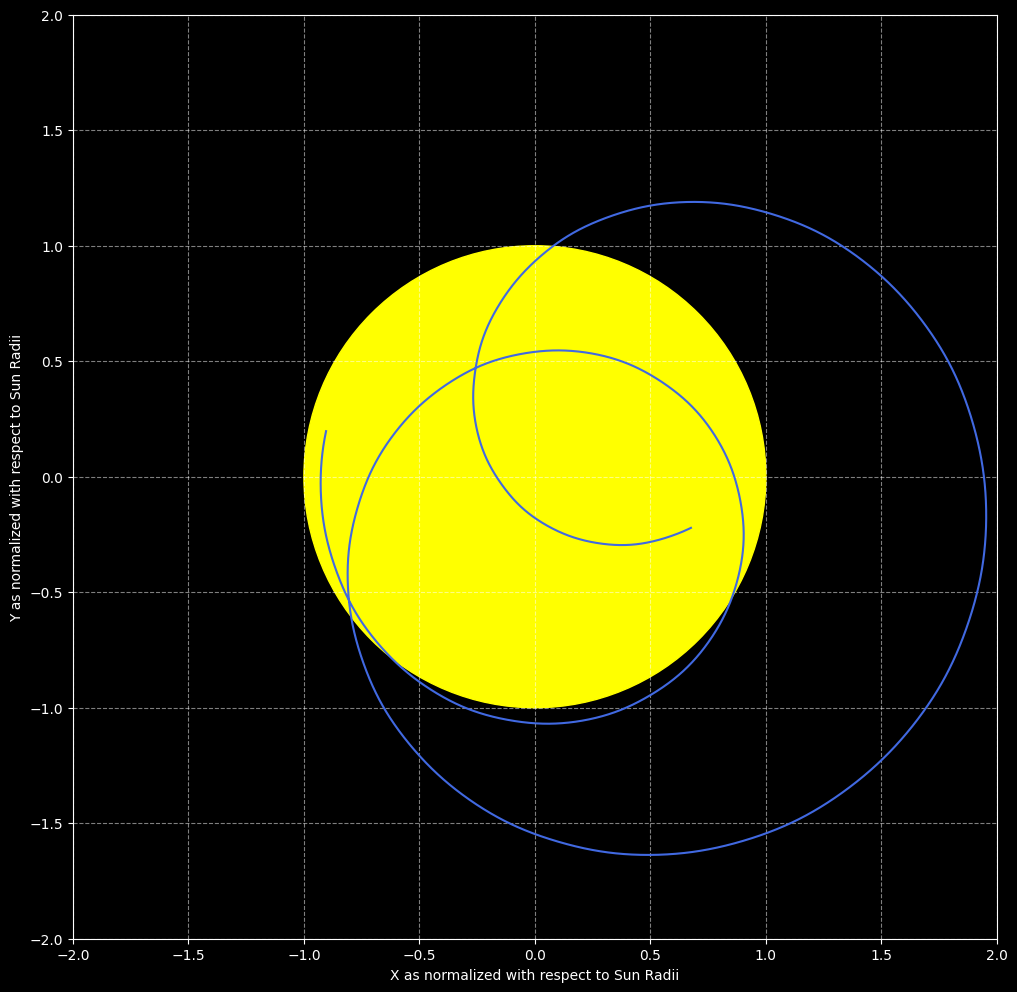

In [9]:
scaled_barycenter_xy = scaled_barycenter[:, 0:2] # Using the xy plane for 2d plot

plt.style.use("dark_background")
fig, ax = plt.subplots(
    figsize = (12, 12)
)

ax.set_aspect("equal")
ax.grid(True, linestyle="dashed", alpha=0.5)
sun_circ = plt.Circle((0.0, 0.0, 0.0), 1.0, color="Yellow")

ax.plot(
    scaled_barycenter_xy[:, 0],
    scaled_barycenter_xy[:, 1],
    ls="solid",
    color="royalblue"
)


ax.add_artist(sun_circ)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_xlabel("X as normalized with respect to Sun Radii")
ax.set_ylabel("Y as normalized with respect to Sun Radii")

Some more calculations about this data

In [10]:
barycenter_outside_sun = len(np.where(scaled_barycenter > 1)[0])
print(f"The Barycenter was outside the sun for a total number of {barycenter_outside_sun} times")

The Barycenter was outside the sun for a total number of 2727 times


In [11]:
print(f"That is {(barycenter_outside_sun/10000) * 100}%")

That is 27.27%
